<a href="https://colab.research.google.com/github/Deepakk200/colab_python/blob/main/Model_Selection_using_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import operator
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

df = pd.read_csv("/content/drive/MyDrive/datasets/dataset.csv")

In [3]:

x = df[['x']].values

y = df[['y']].values

x_train, x_val, y_train, y_val = train_test_split(x , y  , train_size = 0.75 , random_state = 1)
# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10
training_error, validation_error, cross_validation_error = [], [], []

In [4]:
# Loop through the degrees of the polynomial
for d in range(maxdeg + 1):
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(x)
    # Compute the polynomial features for the training data
    x_poly_train = poly.fit_transform(x_train)
    # Compute the polynomial features for the validation data
    x_poly_val = poly.transform(x_val)
    lreg = LinearRegression(fit_intercept=False)
    lreg.fit(x_poly_train, y_train)
    y_train_pred = lreg.predict(x_poly_train)
    y_val_pred = lreg.predict(x_poly_val)
    # Compute the mse on the train data
    training_error.append(mean_squared_error(y_train, y_train_pred))
    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    # Perform cross-validation on the entire data with 10 folds and
    # get the mse_scores
    mse_score = cross_validate(lreg, x_poly, y, scoring='neg_mean_squared_error', cv=10, return_train_score=False)
    # Compute the mean of the cross validation error and store in list
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function
    cross_validation_error.append(-np.mean(mse_score['test_score']))
# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)
# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)


The best degree of the model using validation is 2
The best degree of the model using cross-validation is 2


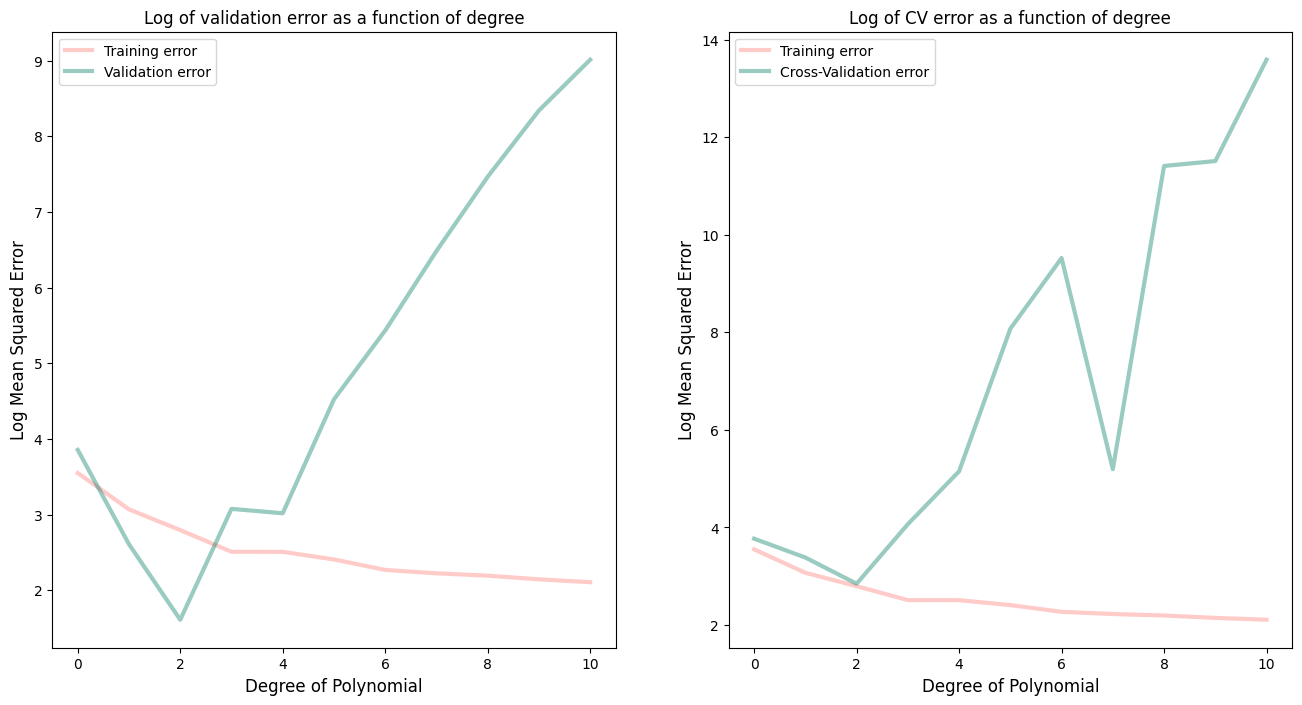

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# Plot the training error with labels
ax[0].plot(range(len(training_error)), np.log(training_error), label='Training error', linewidth=3, color='#FF7E79', alpha=0.4)
# Plot the validation error with labels
ax[0].plot(range(len(validation_error)), np.log(validation_error), label='Validation error', linewidth=3, color="#007D66", alpha=0.4)
# Plot the training error with labels
ax[1].plot(range(len(training_error)), np.log(training_error), label='Training error', linewidth=3, color='#FF7E79', alpha=0.4)
# Plot the cross-validation error with labels
ax[1].plot(range(len(cross_validation_error)), np.log(cross_validation_error), label='Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")
ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")
ax[0].legend()
ax[1].legend()
plt.show()